# K-Means Clustering

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
train = pd.read_csv("train.csv", engine='python',nrows=150000)
features = [col for col in list(train.columns) if 'feature' in col]
train = train[train['weight'] != 0]
train['action'] = (train['resp'].values > 0).astype(int)
f_mean = train.mean()
train = train.fillna(f_mean)
train = train.dropna()
#added to get single class
train_o = train[train['action'] == 0]
train_t = train[train['action'] == 1]
X = np.array(train_o.loc[:, features])
X2 = np.array(train_t.loc[:, features])
X_t = X.tolist() + X2.tolist()
del train, train_o, train_t

print(len(X), len(X2), len(X_t))

56176 60274 116450


## Using the elbow method to find the optimal number of clusters

In [21]:
from sklearn.cluster import KMeans
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

## Training the K-Means model on the dataset

In [22]:
y_predict = []
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_predict.append(np.array(y_kmeans).tolist())
kmeans_t = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_t = kmeans.fit_predict(X2)
y_predict.append((np.array(y_kmeans_t)+4).tolist())

In [23]:
y_predict = y_predict[0]+y_predict[1] #flatten the array to 2 D array

## Visualising the clusters

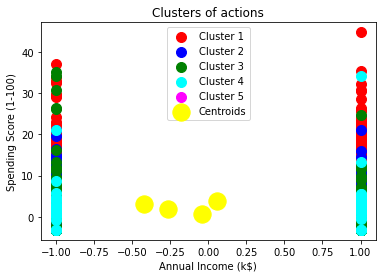

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of actions')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

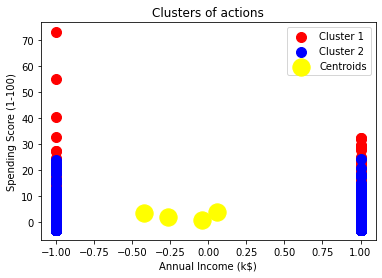

In [25]:
plt.scatter(X2[y_kmeans_t == 0, 0], X2[y_kmeans_t == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans_t == 1, 0], X2[y_kmeans_t == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of actions')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y_predict, test_size = 0.2, random_state = 0)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [14]:
y_pred = np.array(classifier.predict(X_test))
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[0 4]
 [0 0]
 [4 4]
 ...
 [0 4]
 [0 4]
 [0 0]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7451    7    0    0 3337    0    0    0]
 [  16  185    1    0   38   72    0    0]
 [   0    5   33    1    0   17    0    2]
 [   0    0    7    3    0    0    0    0]
 [5253   49    0    0 6364   13    0    0]
 [   0   71    6    0   13  268    0    5]
 [   0    0    0    1    0    0    2    5]
 [   0    1   13    2    0   16    0   33]]


0.6156719622155431

## Training XGBoost on the Training set

In [28]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6346    1    0    0 4448    0    0    0]
 [   2  206    1    0   45   58    0    0]
 [   0    4   29    0    0   16    0    9]
 [   0    0    1    7    0    0    1    1]
 [3568   30    0    0 8075    6    0    0]
 [   0   43   11    0    5  304    0    0]
 [   0    0    1    3    0    0    3    1]
 [   0    0    6    3    0    6    0   50]]


0.6449119793902963

## Applying k-Fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

KeyboardInterrupt: 